# Nikkei High Dividend Yield 50 Analysis with Portfolio Optimizer



## Initialization

If you are using CoLab, first install the dependency PyPortfolioOpt

In [1]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

  Cloning https://github.com/robertmartin8/PyPortfolioOpt.git to /tmp/pip-req-build-1sosb1t3
  Running command git clone -q https://github.com/robertmartin8/PyPortfolioOpt.git /tmp/pip-req-build-1sosb1t3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py prepare_metadata_for_build_wheel /tmp/tmpi11vf528 Check the logs for full command output.


Then get our PortfolioOptimizer library

In [3]:
!git clone https://github.com/robertmartin8/PyPortfolioOpt

Cloning into 'PyPortfolioOpt'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 1379 (delta 25), reused 39 (delta 21), pack-reused 1327
Receiving objects: 100% (1379/1379), 3.96 MiB | 24.57 MiB/s, done.
Resolving deltas: 100% (926/926), done.


In [16]:
%cd PyPortfolioOpt
!python setup.py install

/content/PyPortfolioOpt
running install
running bdist_egg
running egg_info
creating PyPortfolioOpt.egg-info
writing PyPortfolioOpt.egg-info/PKG-INFO
writing dependency_links to PyPortfolioOpt.egg-info/dependency_links.txt
writing requirements to PyPortfolioOpt.egg-info/requires.txt
writing top-level names to PyPortfolioOpt.egg-info/top_level.txt
writing manifest file 'PyPortfolioOpt.egg-info/SOURCES.txt'
writing manifest file 'PyPortfolioOpt.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/pypfopt
copying pypfopt/cla.py -> build/lib/pypfopt
copying pypfopt/objective_functions.py -> build/lib/pypfopt
copying pypfopt/base_optimizer.py -> build/lib/pypfopt
copying pypfopt/discrete_allocation.py -> build/lib/pypfopt
copying pypfopt/black_litterman.py -> build/lib/pypfopt
copying pypfopt/hierarchical_risk_parity.py -> build/lib/pypfopt
copying pypfopt/value_at_risk.py -> bu

In [18]:
%cd /content/


/content
/content


In [29]:
%cd PyPortfolioOpt

[Errno 2] No such file or directory: 'PyPortfolioOpt'
/content/PyPortfolioOpt


In [30]:
!wget https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py

--2020-02-16 02:55:58--  https://raw.githubusercontent.com/cartasuzuki/phynance/master/PortfolioOptimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2701 (2.6K) [text/plain]
Saving to: ‘PortfolioOptimizer.py’

PortfolioOptimizer. 100%[===================>]   2.64K  --.-KB/s    in 0s      

2020-02-16 02:55:59 (51.5 MB/s) - ‘PortfolioOptimizer.py’ saved [2701/2701]



In [24]:
%cd PyPortfolioOpt

/content/PyPortfolioOpt


Import libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pypfopt
from PortfolioOptimizer import PortfolioOptimizer

In [0]:
from PortfolioOptimizer import PortfolioOptimizer

Get Dataset

In [0]:
stock_symbols = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_weight_en.csv')

Once we have loaded our stock symbols dataset we can either use the prices in the csv file or download prices from alphadvantage to get updated data.

### Filter out some stocks from the index

Chose a minimum div/yield. Set to 0 if you want to use all stocks in the index

In [0]:
min_yield = 3.7

In [0]:
selected_stocks = stock_symbols[stock_symbols['Dividend']>min_yield]

Create a filter string (highDivString) to be used later to filter stocks with lower yield than min_yield

In [0]:
highDivString = selected_stocks['Code'].values.astype(int)
highDivString = highDivString.astype(str)
string = '.TOK'
highDivString = [x + string for x in highDivString]

### Method 1: use csv file

Read the stock prices from the csv provided in our repository

In [0]:
stocks = pd.read_csv('https://raw.githubusercontent.com/cartasuzuki/phynance/master/datasets/nikkei_high_dividend_yield_50_prices.csv', index_col= ['timestamp'], parse_dates= ['timestamp'])

If you want higher yield filter out using the filter previously created

In [0]:
stocks = stocks[highDivString]

### Method 2: Get prices from alphadvantage

Using the highDivString filter, download prices from alpadvantage

In [0]:
stocks = PortfolioOptimizer.get_stock_prices(highDivString)  

## Remove some stocks to improve sectore coverage

In [0]:
droplist = ['8002.TOK','8058.TOK','2768.TOK' ]
stocks = stocks.drop(droplist, axis = 1)

## Portfolio Optimization

In [0]:
weights, sharpe, ret = PortfolioOptimizer.optimize_portfolio(stocks,0)

8035.TOK: 37.0%
8053.TOK: 24.0%
8628.TOK: 19.0%
9437.TOK: 15.0%
Sharpe: 0.36
Exp. Return: 9.49


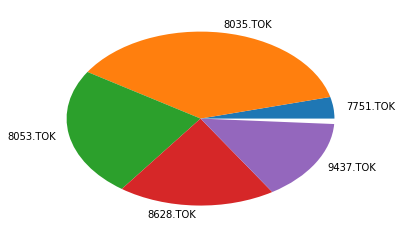

In [0]:
PortfolioOptimizer.print_portfolio_result(weights, sharpe, ret)
PortfolioOptimizer.portfolioAsPieChart(weights)

Average yield

In [0]:
selected_stocks['Dividend'].mean()

4.3795238095238105

Remove 0s and TOK string.

In [0]:
www ={x:y for x,y in weights.items() if y>0.001}
portfolio =list(www.keys())
portfoliovalues = list(www.values())
portfolio = [s.replace('.TOK','') for s in portfolio]

### Resulting Portfolio and Yield

In [0]:
selected_stocks = selected_stocks[selected_stocks['Code'].isin(portfolio)]
selected_stocks['Weight'] = portfoliovalues

In [0]:
selected_stocks

,Date of Data,Code,Company Name,Nikkei Industrial Classification,Weight,Dividend
26,2018/11/30,7751,CANON INC.,Electric Machinery,0.04,4.31
30,2018/11/30,8035,TOKYO ELECTRON LTD.,Electric Machinery,0.37,4.03
31,2018/11/30,8053,SUMITOMO CORP.,Trading Companies,0.24,4.10
42,2018/11/30,8628,"MATSUI SECURITIES CO., LTD.",Securities,0.19,8.26
48,2018/11/30,9437,"NTT DOCOMO, INC.",Communications,0.15,3.90


In [0]:
 Div_Yield = np.average(selected_stocks['Dividend'], weights=selected_stocks['Weight'])
round(Div_Yield, 2)

4.85